In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [39]:
df = pd.read_csv("C:/Users/musma/OneDrive/Desktop/DS/AI Project/Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

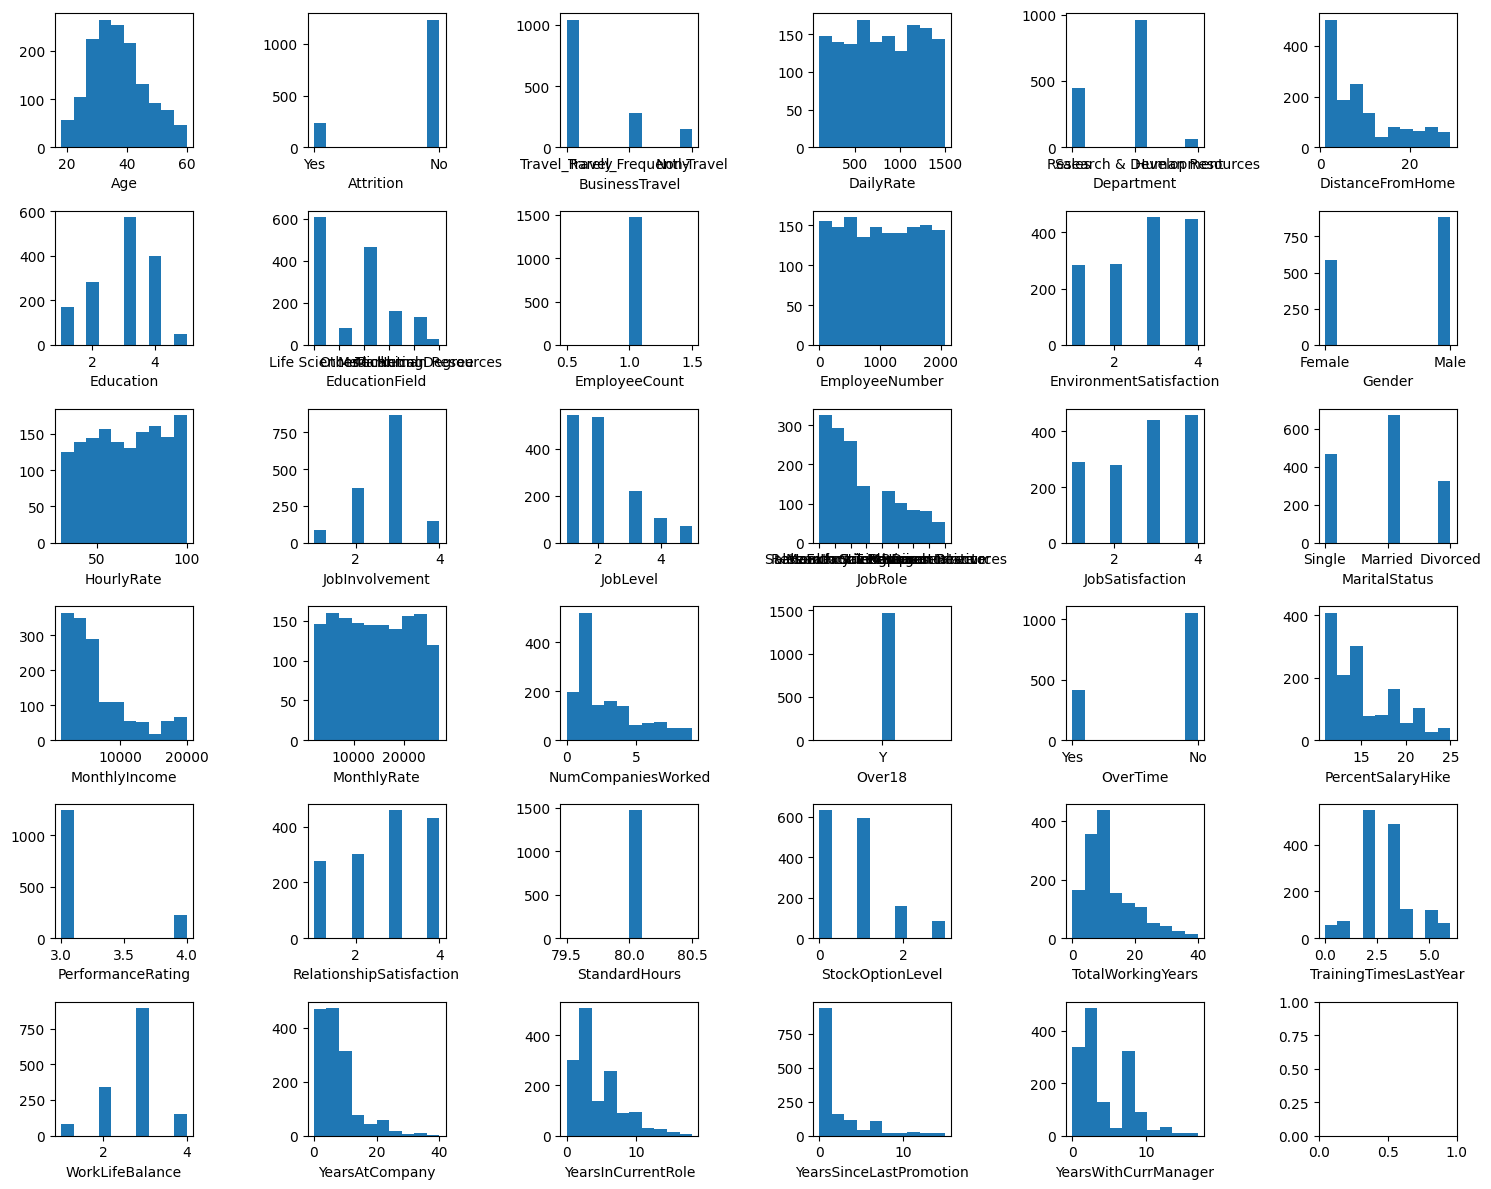

In [43]:
fig, ax = plt.subplots(6, 6, figsize = (15, 12))
ax = ax.flatten()

for i, col in enumerate(df.columns[:35]):
    ax[i].hist(df[col])
    ax[i].set_xlabel(col)
plt.tight_layout()
plt.show()

In [44]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [45]:
df_categorical = df.select_dtypes(include="object")
df_categorical

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [46]:
# drop the irrelevant columns
df = df.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [48]:
Q1 = df.select_dtypes(include = ["number"]).quantile(0.25)
Q3 = df.select_dtypes(include = ["number"]).quantile(0.75)
IQR = Q3 - Q1

outliers = (df.select_dtypes(include = ["number"]) < (Q1 - 1.5 * IQR)) | (df.select_dtypes(include = ["number"]) > (Q3 + 1.5 * IQR))
outliers

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
print("Outliers Sum")
outliers.sum()

Outliers Sum


Age                           0
DailyRate                     0
DistanceFromHome              0
Education                     0
EnvironmentSatisfaction       0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction               0
MonthlyIncome               114
MonthlyRate                   0
NumCompaniesWorked           52
PercentSalaryHike             0
PerformanceRating           226
RelationshipSatisfaction      0
StockOptionLevel             85
TotalWorkingYears            63
TrainingTimesLastYear       238
WorkLifeBalance               0
YearsAtCompany              104
YearsInCurrentRole           21
YearsSinceLastPromotion     107
YearsWithCurrManager         14
dtype: int64

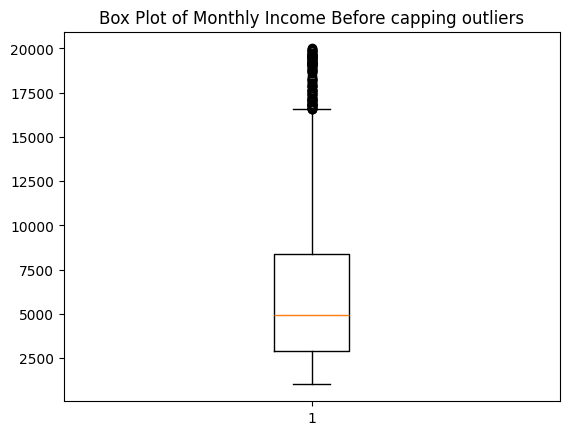

In [50]:
plt.boxplot(df["MonthlyIncome"])
plt.title("Box Plot of Monthly Income Before capping outliers")
plt.show()

In [51]:
df['TrainingTimesLastYear'].value_counts().sort_index()

TrainingTimesLastYear
0     54
1     71
2    547
3    491
4    123
5    119
6     65
Name: count, dtype: int64

In [ ]:
# Capping the Outliers

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

outlier_cols = ['MonthlyIncome', 'NumCompaniesWorked','StockOptionLevel',
                'TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole', 
                'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in outlier_cols:
    cap_outliers(df, col)

print(df[outlier_cols].sum())

MonthlyIncome              9351981.0
NumCompaniesWorked            3933.0
StockOptionLevel              1124.5
TotalWorkingYears            16321.5
TrainingTimesLastYear         3985.0
YearsAtCompany                9728.0
YearsInCurrentRole            6185.5
YearsSinceLastPromotion       2826.5
YearsWithCurrManager          6038.0
dtype: float64


In [53]:
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR

# Now check if any value exceeds upper bound after capping
print(df[df['MonthlyIncome'] > upper])  # Should print an empty DataFrame or none


Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 31 columns]


In [54]:
def check_outliers_capped(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        if outliers.empty:
            print(f"{col}: All outliers capped successfully.")
        else:
            print(f"{col}: Outliers still present!")

check_outliers_capped(df, outlier_cols)

MonthlyIncome: All outliers capped successfully.
NumCompaniesWorked: All outliers capped successfully.
StockOptionLevel: All outliers capped successfully.
TotalWorkingYears: All outliers capped successfully.
TrainingTimesLastYear: All outliers capped successfully.
YearsAtCompany: All outliers capped successfully.
YearsInCurrentRole: All outliers capped successfully.
YearsSinceLastPromotion: All outliers capped successfully.
YearsWithCurrManager: All outliers capped successfully.


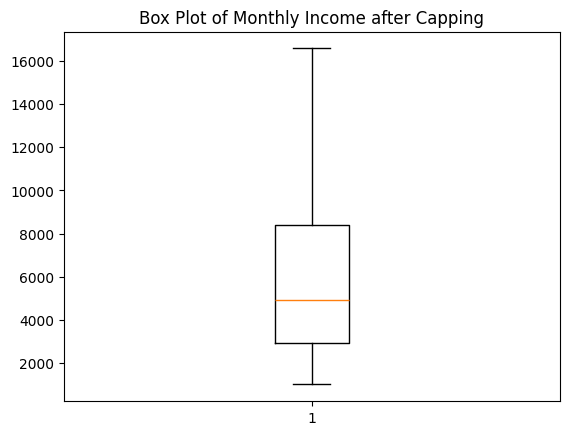

In [55]:
plt.boxplot(df["MonthlyIncome"])
plt.title("Box Plot of Monthly Income after Capping")
plt.show()

In [56]:
# why we use label encoder because (Tree-based models (Random Forest) ko farak nahi padta,
# kyunki woh numerical values ko categories ki tarah hi treat karte hain. in other terms 
# tree-based models that don't assume numerical relationships between values)

binary_cols = ["Attrition", "Gender", "OverTime"]
labelencoded = LabelEncoder()
for col in binary_cols:
    df[col] = labelencoded.fit_transform(df[col])
df    


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,...,3,3,1.0,17.0,3.0,3,5,2.0,0.0,3.0
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,...,3,1,1.0,9.0,4.5,3,7,7.0,1.0,7.0
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,...,4,2,1.0,6.0,0.5,3,6,2.0,0.0,3.0
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,...,3,4,0.0,17.0,3.0,2,9,6.0,0.0,8.0


In [57]:
# Performing one hot encoding for nominal columns that has no order

nominal_cols = ["Department", "EducationField", "JobRole", "MaritalStatus"]
df = pd.get_dummies(df, columns = nominal_cols)
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,Travel_Rarely,1102,1,2,2,0,94,3,...,False,False,False,False,False,True,False,False,False,True
1,49,0,Travel_Frequently,279,8,1,3,1,61,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1,Travel_Rarely,1373,2,2,4,1,92,2,...,True,False,False,False,False,False,False,False,False,True
3,33,0,Travel_Frequently,1392,3,4,4,0,56,3,...,False,False,False,False,True,False,False,False,True,False
4,27,0,Travel_Rarely,591,2,1,1,1,40,3,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,23,2,3,1,41,4,...,True,False,False,False,False,False,False,False,True,False
1466,39,0,Travel_Rarely,613,6,1,4,1,42,2,...,False,False,False,False,False,False,False,False,True,False
1467,27,0,Travel_Rarely,155,4,3,2,1,87,4,...,False,False,True,False,False,False,False,False,True,False
1468,49,0,Travel_Frequently,1023,2,3,4,1,63,2,...,False,False,False,False,False,True,False,False,True,False


In [61]:
# Treating Buisness Travel as binary 
travel_map = {"Non-Travel" : 0, "Travel_Rarely" : 1, "Travel_Frequently" : 2}
df["BusinessTravel"] = df["BusinessTravel"].map(travel_map)
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,0,94,3,...,False,False,False,False,False,True,False,False,False,True
1,49,0,2,279,8,1,3,1,61,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1,1373,2,2,4,1,92,2,...,True,False,False,False,False,False,False,False,False,True
3,33,0,2,1392,3,4,4,0,56,3,...,False,False,False,False,True,False,False,False,True,False
4,27,0,1,591,2,1,1,1,40,3,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,1,41,4,...,True,False,False,False,False,False,False,False,True,False
1466,39,0,1,613,6,1,4,1,42,2,...,False,False,False,False,False,False,False,False,True,False
1467,27,0,1,155,4,3,2,1,87,4,...,False,False,True,False,False,False,False,False,True,False
1468,49,0,2,1023,2,3,4,1,63,2,...,False,False,False,False,False,True,False,False,True,False


In [95]:
x = df.drop(['Attrition'], axis=1)
y = df["Attrition"]

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [101]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,             # limit tree depth
    min_samples_split=5,      # min samples needed to split node
    random_state=42,
)
model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [102]:
y_pre = model.predict(x_test)
accuracy_score(y_test, y_pre)

0.8367346938775511

In [103]:
# Training accuracy
y_train_pred = model.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9003067484662577
Testing Accuracy: 0.8367346938775511


In [ ]:
features = pd.Series(model.feature_importances_, index = x.columns)
sns.barplot(x = features , y = features.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(50,40))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Cross Validation Score:  [0.67857143 0.91560102 0.9028133  0.90792839 0.89514066]
Mean Cross Validation Score: 0.8600109609061015
Confusion Matrix:
 [[231  24]
 [ 24  15]]


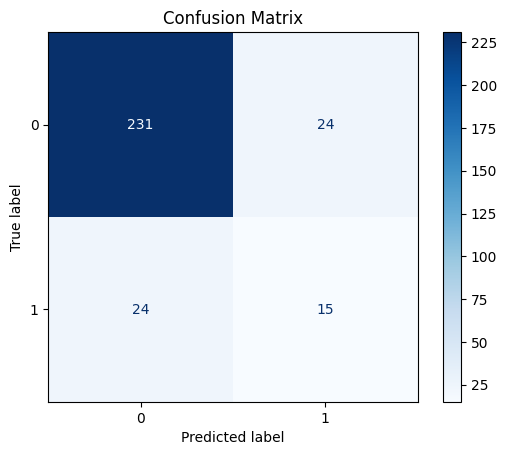

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       255
           1       0.38      0.38      0.38        39

    accuracy                           0.84       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.84      0.84      0.84       294



In [104]:
cv_scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv = 5)
print("Cross Validation Score: ",cv_scores)
print("Mean Cross Validation Score:", np.mean(cv_scores))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pre)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pre)) 